# Protein Works Marketing Data Presentation

### Set-up of dependencies

Before starting, we shall do the necessary set-up for this project. Firstly, we install the appropriate packages using pip into you virtual environment in order to import the python packages we need.

In [3]:
pip install pandas
pip install fsspec
pip install openpyxl
pip install seaborn
pip install matplotlib

     ---------------------------------------- 11.1/11.1 MB 8.0 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 15.6/15.6 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Once these packages have been installed, we then import them to our interactive notebook in order to use them in this project.

In [70]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning) #to ignore warning messages from seaborn plots

import pandas as pd #package for creating dataframe
import seaborn as sns #package for visualisation
import matplotlib.pyplot as plt #package for visualisation
import numpy as np
from matplotlib.dates import DateFormatter

### **Task 1** (Marketing Metrics)

We begin by loading in the relevent datasets from the given excel file. We label the dataset regarding the marketing data as *marketing_data_df* and the dataset for the trading data as *trading_data_df*. 

In [3]:
file_path = r"C://Users//Daniel H//Desktop//Protein Work Project//Data and Presentation Brief.xlsx" #path of excel file
marketing_data_df = pd.read_excel(file_path, sheet_name = 0) #load excel file of dataset into pandas dataframe
trading_data_df = pd.read_excel(file_path, sheet_name = 1) #load excel file of transaction data into pandas dataframe

print('The Marketing dataset,')
display(marketing_data_df.head()) #display the first 5 records of each dataframe
print('\nThe Trading dataset,')
display(trading_data_df.head())

The Marketing dataset,


,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
0,2021-02-01,IT,PLA,260,154207,690,23,0,0
1,2021-03-01,IT,PLA,1851,1372206,5224,0,0,0
2,2021-03-01,DE,PLA,1699,876702,3904,0,0,0
3,2021-08-01,IE,PLA,1082,208752,862,0,0,0
4,2021-01-01,FR,PLA,422,142886,567,0,0,0



The Trading dataset,


,unit_sale_price_gbp
0,11.050291
1,24.606605
2,26.305537
3,17.347053
4,27.204231


Now that we have our data stored in dataframes, we can now calculate the desired metrics. The first metrics we will calculate is the **Spend-to-Revenue Ratio**, as a percentage. This can be calculated with the following formula;

$$
\text{S:R} = \frac{\text{Total Spend}}{\text{Total Revenue}} \times 100.
$$

In [102]:
total_spend = marketing_data_df['spend'].sum() #total sum of 'spend' column
total_revenue = marketing_data_df['revenue'].sum() #total sum of 'revenue' column
sr = round(total_spend*100/total_revenue,2) #evaluate ratio as percentage to 2dp
print(f"The ratio of spend to revenue (S:R), as a percentage, is:\n\n{sr}%")

The ratio of spend to revenue (S:R), as a percentage, is:

42.52%


We calculate that the S:R ratio at **42.52%**. So, for this period of time (Jan 2021 - Sept 2022), roughly 42% of revenue generated was used to cover its costs and expenditures. A lower metric value is usually desired, as a low ratio indicates a smaller proportion of revenue used to cover expenses. However, some industries naturally have a higher ratio than others. For example, retail, manufacturing and transportation *typically* have higher ratios as operational costs include rent, salaries, raw materials and fuel, which all scale with expanditure and therefore it's harder to lower this ratio below certain thresholds. Whereas industries such as e-commerce, software-as-a-service (SAAS) and financial services have *typically* lower ratios as the development od software is relatively cheaper and once finished, maintanence is low.

For Protein Works, who's main output is protein shakes (manufacturing), a ratio of 42.52% seems to indicate a healthy approach to spending in respect to revenue earned.

The second metric to calculate is the **Average Order Value**. This metric tells us how much revenue returned to expect per order. This is calculated with the following,

$$
\text{AOV} = \frac{\text{Total Revenue}}{\text{Total Number of Transactions}}.
$$

In [103]:
total_transactions = marketing_data_df['transactions'].sum() 
aov = round(total_revenue/total_transactions,2)
print(f'The Average Order Value (AOV) is:\n\n£{aov}')

The Average Order Value (AOV) is:

£39.82


We calculate that the average order value is **£39.82** for the period of January 2021 - September 2022.

The next metric is the **Cost per Acquisition**. This metric measures the expected amount spent during a period for each new customer acquired. This is simply the calculated with,

$$
\text{CPA} = \frac{\text{Total Spend}}{\text{Total New Customer}}.
$$

In [52]:
total_new_customer_transactions = marketing_data_df['new_customer_transactions'].sum()
cpa = round(total_spend/total_new_customer_transactions,2)
print(f'The Cost per Acquisition (CPA) is:\n\n£{cpa}')

The Cost per Acquisition (CPA) is:

£33.09


During the studied period, we see that Protein Works' CPA is **£33.09**. Without any historical data to refer to and not knowing the interal goals set by management about the cost per new customer acquired, I cannot say whether this value reflects positively or negatively. However, if used alongside the previously evaluated AOV metric, we can state that we can expect every £33.09 spent on acquiring a new customer, that customer will put back into the company £39.82. So we can say that for each new customer, we can expect a profit of £6.72. This does assume that the newly acquired customer's AOV follows the same distribution as the previous customers.

The next metric we want toe measure is the **Click Through Rate**. This metric is simply what percentage of people who viewed our adverts went on to click the ad. It is a measure of how efficient Protein Works' advertisement is doing in general at drawing in customers. This is calculated with the following,

$$
\text{CTR} = \frac{\text{Total clicks on ads}}{\text{Total views on ads}} \times 100.
$$

In [7]:
total_clicks = marketing_data_df['clicks'].sum()
total_impressions = marketing_data_df['impressions'].sum()
ctr = round(total_clicks*100/total_impressions,2)
print(f'The Click through rate (CTR) is:\n\n{ctr}%')

The Click through rate (CTR) is:

0.79%


The calculated Click Through Rate is **0.79%**, meaning that for every 1000 people who view Protein Works' adverts across the 5 coutnries this data is gathers from, we would expect roughly 8 people to click on it and go to the businesses website. However, we also need to calculate how many of them would go on to buy something from the company.

The final metric is the Conversion rate, the rate at which a customer on the website makes a purchase. This is calculate with,

$$
\text{CVR} = \frac{\text{Total number of transactions}}{\text{Total clicks on ads}}.
$$

In [8]:
total_transactions = marketing_data_df['transactions'].sum()
cvr = round(total_transactions*100/total_clicks,2)
print(f'The Conversion rate (CVR) is:\n\n{cvr}%')

The Conversion rate (CVR) is:

5.77%


The Conversion rate of Protein Works is **5.77%**. This means that for every 100 people who view your online store, roughly 6 people will end up making a transaction. Using this and the previously calculated metric of the CVR, we can state that,

$$
\mathbb{P}[\text{'An impression leads to a purchase'}] = (0.79 \times 5.77)\% = 4.5583\%.
$$

So on average roughly 4.5% of impressions on a Protein Works advert end up making a purchase. In order to increase this expected value of returns to the company, you either increase the CTR by more efficient or targetted advertisement strategies, or by increasing the CVR by improving UI experience by A/B testing. These are however just example suggestions on how to improve and to know that a practical limit to these values exists.

In Summary,

|Metric|Value|
|-|-|
|S:R| 42.52% |
|AOV| £39.82 |
|CPA| £33.09 |
|CTR| 0.79% |
|CVR| 5.77% |

In [238]:
marketing_data_df = marketing_data_df.sort_values(by=['date','country','tpw_channels'],ascending=True)

def generate_metrics(df):
    df['spend_revenue_ratio'] = df['spend']*100/df['revenue'] #create S:R column
    df['average_order_value'] = df['revenue']/df['transactions'] #create AOV column
    df['cost_per_acquisition'] = df['spend']/df['new_customer_transactions'] #create CPA column
    df['click_through_rate'] = df['clicks']/df['impressions'] #create CTR column
    df['conversion_rate'] = df['transactions']/df['clicks'] #create CVR column
    return df

marketing_data_df = generate_metrics(marketing_data_df)

display(marketing_data_df)

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
4,2021-01-01,DE,Brand,164,1335,484,1039,18,5,15.784408,57.722222,32.800000,0.362547,0.037190
13,2021-01-01,DE,Non-Brand,39,832,70,63,1,1,61.904762,63.000000,39.000000,0.084135,0.014286
9,2021-01-01,DE,PLA,589,204746,1166,0,0,0,inf,NaN,inf,0.005695,0.000000
5,2021-01-01,FR,Brand,121,1315,538,1070,21,5,11.308411,50.952381,24.200000,0.409125,0.039033
1,2021-01-01,FR,Non-Brand,89,3384,257,116,3,1,76.724138,38.666667,89.000000,0.075946,0.011673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2022-09-01,IT,Non-Brand,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
304,2022-09-01,IT,PLA,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
312,2022-09-01,UK,Brand,1522,3330,1858,20068,226,54,7.584214,88.796460,28.185185,0.557958,0.121636
310,2022-09-01,UK,Non-Brand,4703,87708,4409,6431,167,103,73.130151,38.508982,45.660194,0.050269,0.037877


In [252]:
all_channels_marketing_data_df = marketing_data_df.groupby(['date','country'])[['spend','impressions','clicks','revenue','transactions','new_customer_transactions']].sum().reset_index()

all_channels_marketing_data_df = generate_metrics(all_channels_marketing_data_df)
display(marketing_data_df[marketing_data_df['country']=='FR'][['date','impressions','clicks','click_through_rate','tpw_channels']].head())
display(all_channels_marketing_data_df[all_channels_marketing_data_df['country']=='FR'][['date','impressions','clicks','click_through_rate']])

,date,impressions,clicks,click_through_rate,tpw_channels
5,2021-01-01,1315,538,0.409125,Brand
1,2021-01-01,3384,257,0.075946,Non-Brand
11,2021-01-01,142886,567,0.003968,PLA
29,2021-02-01,673,273,0.405646,Brand
16,2021-02-01,524,49,0.093511,Non-Brand


,date,impressions,clicks,click_through_rate
1,2021-01-01,147585,1362,0.009229
6,2021-02-01,159398,942,0.005910
11,2021-03-01,1132191,7246,0.006400
16,2021-04-01,1167273,9911,0.008491
21,2021-05-01,1563881,3133,0.002003
26,2021-06-01,1213164,4403,0.003629
31,2021-07-01,1230158,6696,0.005443
36,2021-08-01,1167475,5390,0.004617
41,2021-09-01,948232,5412,0.005707
46,2021-10-01,678869,4459,0.006568


### **Task 2** (Marketing Exploratory Data Analysis and Visualisation)

#### Detecting Anomalies

For detecting anomalies, there are varying approaches to this problem. One approach is using statistical tests and transformations to assertain whether anomilous data exists. These can include using the Interquartile Range (IQR). If a data point is not found within 1.5 times this IQR, then we could make a case for this data point to be an anomaly.

$$
\mu - 1.5 \cdot IQR < X < \mu + 1.5 \cdot IQR, \text{ where   } IQR := Q_3 - Q_1.
$$

We could also transform our data into a more standardised form using Z-Scored. Using the mean ($\mu$) and the standard deviation ($\sigma$) of the data set, we can transform the data into values that represent their relative distance from the mean. If a point has an absolute Z-score of over 2 or 3, then we could class that point as an anomaly.

$$
X \rightarrow{} Z := \frac{X - \mu}{\sigma}.
$$

Another way is using a Simple Moving Average (SMA). Used in time series analysis, it provides information about trends dependent upon the timespan you use for it. If the mean deviates significantly, then an anomaly may be present.

However, visualising the data inself can be as equally useful in regards to anomaly detection, and can show you seasonal trends which may be mistaken as anomalies by the statistical approaches.

Furthermore, common-sense can help elimanate anomalous data when seen. For instance, it is impossible for any of the numerical values within this dataset to be negative as they are empirical measurments. Therefore, if any values are stored as negative then we know sometings is wrong (as you can't have negative amount of impressions or a negative number of times your adverts where clicked on). Also, we know that the number of new transactions must be apart of the total transactions, so if we find values such that '*new_customer_transactions*' > '*transactions*' we can consider them to be anomalous. Furthermore, if the new of transactions is 0, then you would expect the revenue to be 0 as well. If this is not the case for some records, then an error may have been made.

- 'spend', 'impressions', 'revenue', 'transaction', 'new_customer_transactions' $\geq$ 0,
- 'impressions $\geq$ 'clicks',
- 'transactions' $\geq$ 'new_customer_transactions',
- If 'transactions' = 0 $\implies$ 'revenue' = 0.

We can quickly check for the first condition of positivity.

In [130]:
display(marketing_data_df[(marketing_data_df[['spend','impressions','clicks','revenue','transactions','new_customer_transactions']] < 0).any(axis=1)])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
248,2021-06-01,FR,Non-Brand,305,9772,-929,428,11,4
264,2021-05-01,FR,Non-Brand,1008,33134,-3523,877,18,12


We have found 2 records which both have negative values for the number of clicks. To deal with this, lets have a look at the context of these values and see if their absolute value is roughly equal to the surrounding values.

In [258]:
display(marketing_data_df[(marketing_data_df['country'] == 'FR')&(marketing_data_df['tpw_channels'] == 'Non-Brand')][['date','clicks']].sort_values('date',ascending=True))

,date,clicks
1,2021-01-01,257
16,2021-02-01,49
35,2021-03-01,2153
59,2021-04-01,4084
60,2021-05-01,-3523
86,2021-06-01,-929
101,2021-07-01,1511
109,2021-08-01,454
129,2021-09-01,1198
139,2021-10-01,1210


As we can see, the absolute value of our negative values are roughly equal to the surrounding data. This may indicate to us that this data specifically was simply entered incorrectly with the addition of the negative sign, with the absolute value itself correct. To correct this we simply change the sign of the data (noting the change for later talks with management).

In [267]:
marketing_data_df['clicks'] = marketing_data_df['clicks'].apply(lambda x: -x if x<0 else x) #multiple the negative values with -1
display(marketing_data_df[(marketing_data_df['country']=='FR')&(marketing_data_df['date']=='2021-05-01')]) #

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
69,2021-05-01,FR,Brand,242,2255,920,4278,86,30,5.656849,49.744186,8.066667,0.407982,0.093478
60,2021-05-01,FR,Non-Brand,1008,33134,3523,877,18,12,114.937286,48.722222,84.000000,-0.106326,-0.005109
73,2021-05-01,FR,PLA,5049,1528492,5736,2520,81,67,200.357143,31.111111,75.358209,0.003753,0.014121


We can see that the 'Non-Brand' data for 'clicks' has now been changes to be positive while the rest of the data remains positive. No we will check for the second condition we established ('impressions' > 'clicks').

In [270]:
display(marketing_data_df[marketing_data_df['impressions'] < marketing_data_df['clicks']])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
180,2022-01-01,FR,Brand,254,2114,2328,3797,81,27,6.689492,46.876543,9.407407,1.101230,0.034794
211,2022-03-01,FR,Brand,477,2254,2323,4466,91,31,10.680699,49.076923,15.387097,1.030612,0.039173
238,2022-04-01,FR,Brand,329,2026,2078,4167,87,25,7.895368,47.896552,13.160000,1.025666,0.041867
276,2022-07-01,FR,Brand,275,1847,1893,4247,75,24,6.475159,56.626667,11.458333,1.024905,0.039620
286,2022-08-01,FR,Brand,308,2052,2085,3937,77,20,7.823216,51.129870,15.400000,1.016082,0.036930
302,2022-09-01,FR,Brand,123,783,810,1967,37,11,6.253177,53.162162,11.181818,1.034483,0.045679


We have found some data that breaks this rule, where the number of clicks exceeds the number of impressions. This curiously happens in France for Brand channels. Furthermore, this data was all gathered from the end of 2021. However, we cannot say for certain which value is incorrect. However, we may be able to get an idea of which column is incorrect be comparing them against eachother and other features of the dataset and use historical data. Since impressions, clicks and transactions all relate to eachother, we should be able to see where the error occured. Indeed,

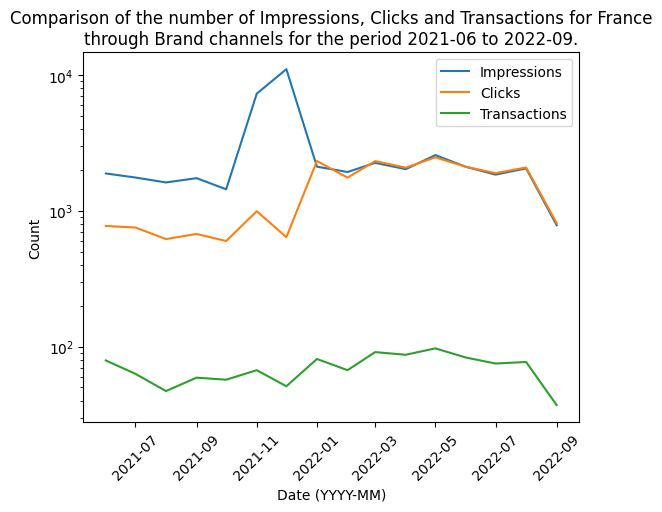

In [289]:
df = marketing_data_df[(marketing_data_df['country']=='FR')&(marketing_data_df['tpw_channels']=='Brand')&(marketing_data_df['date'] >= '2021-06-01')]
ax = sns.lineplot(x=df['date'],
             y=df['impressions'],
             label='Impressions')
ax = sns.lineplot(x=df['date'],
             y=df['clicks'],
             label='Clicks')
ax = sns.lineplot(x=df['date'],
             y=df['transactions'],
             label='Transactions')
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Count')
plt.title('Comparison of the number of Impressions, Clicks and Transactions for France\nthrough Brand channels for the period 2021-06 to 2022-09.')
plt.yscale('log')
plt.show()

Above are the trend lines for each of the features we are observing, Impressions, Clicks and Transactions. We can see that throughout this period, the clicks and the transactions follow eachother near perfectly, were one increases, the other increases also. Furthermore, they stay relatively at constant widths apart showing strong linear correlation between the two. However, we see that after a period of increase in impressions, which is clearly matched by the number of clicks for the period 2021-10 to 2021-12, the number of impressions sharply decreases to match the number of clicks where it remains almost exactly matching the values. Since no other trend line follows this pattern, it does suggest that it is the impression count that is incorrect. Perhaps by error of collection, where a missing 1 is meant to be at the beginning of the impression count. This is futher backed up when considering the corralation coefficients of each feature.

In [298]:
display(df[['impressions','clicks','transactions']].corr())

,impressions,clicks,transactions
impressions,1.000000,-0.224281,-0.155667
clicks,-0.224281,1.000000,0.829963
transactions,-0.155667,0.829963,1.000000


It tells us that a weak negative correlation exists between impressions and the 2 other features, whereas a strong positive correlation exists between clicks and transactions. This tells us that the impression count for this period are incorrect and a problem exists within the collection process of this data. However, my theory about a missing 1 is simply a theory and there is no way of knowing for certain what this data is meant to be. So for now we shall leave it as it is while keeping these findings in mind when evaluating any trends we discover in the future.

Now we shall check our thrid condition for clean data ('transactions' > 'new_customer_transactions').

In [271]:
display(marketing_data_df[marketing_data_df['transactions'] < marketing_data_df['new_customer_transactions']])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
253,2022-05-01,IE,Non-Brand,660,20103,1004,1003,24,38,65.802592,41.791667,17.368421,0.049943,0.023904
250,2022-05-01,IE,PLA,1158,193603,1134,2020,55,93,57.326733,36.727273,12.451613,0.005857,0.048501
268,2022-06-01,IE,Non-Brand,738,19265,973,889,22,43,83.014623,40.409091,17.162791,0.050506,0.022610
255,2022-06-01,IE,PLA,1660,274070,1898,2171,66,120,76.462460,32.893939,13.833333,0.006925,0.034773
273,2022-07-01,IE,Non-Brand,400,11169,511,488,12,23,81.967213,40.666667,17.391304,0.045752,0.023483
283,2022-07-01,IE,PLA,1196,208778,1180,2304,59,103,51.909722,39.050847,11.611650,0.005652,0.050000
287,2022-08-01,IE,Non-Brand,546,12266,624,558,15,28,97.849462,37.200000,19.500000,0.050872,0.024038
295,2022-08-01,IE,PLA,1531,246912,1527,3075,88,163,49.788618,34.943182,9.392638,0.006184,0.057629
314,2022-09-01,IE,Non-Brand,158,2623,160,206,5,10,76.699029,41.200000,15.800000,0.060999,0.031250
300,2022-09-01,IE,PLA,572,86376,629,1186,31,55,48.229342,38.258065,10.400000,0.007282,0.049285


Here we discover that 10 entries break this condition, all from Ireland through Non-Brand and PLA channels for the final 5 months of the data. Furthermore, we see that the number of new customer transactions is roughly double the total number of transactions for each. This suggest that an error has occured with the collection process of this data. However, the fact that the count for the new customer transactions does not exceed 2 times that of the transactions suggest that maybe the transaction count was added to the new customer transaction count by mistake when it was gathered.

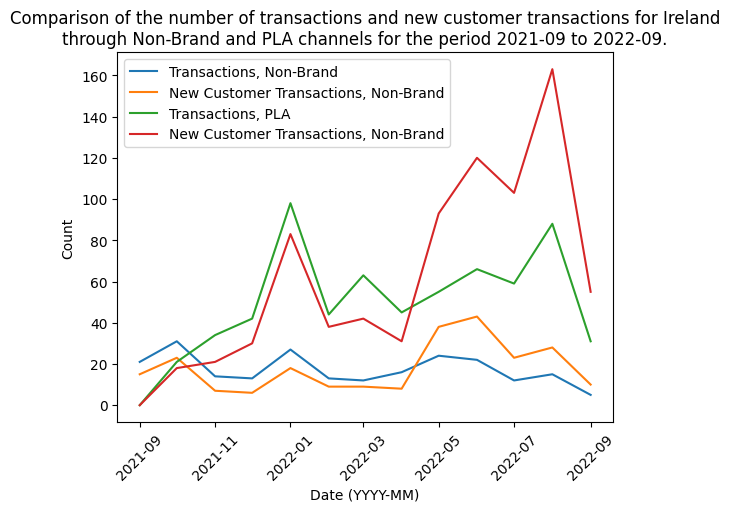

In [313]:
df = marketing_data_df[(marketing_data_df['country']=='IE')&(marketing_data_df['tpw_channels']!='Brand')&(marketing_data_df['date'] >= '2021-09-01')]
ax = sns.lineplot(x=df[df['tpw_channels']=='Non-Brand']['date'],
                  y=df[df['tpw_channels']=='Non-Brand']['transactions'],
                  label='Transactions, Non-Brand')
ax = sns.lineplot(x=df[df['tpw_channels']=='Non-Brand']['date'],
                  y=df[df['tpw_channels']=='Non-Brand']['new_customer_transactions'],
                  label='New Customer Transactions, Non-Brand')
ax = sns.lineplot(x=df[df['tpw_channels']=='PLA']['date'],
                  y=df[df['tpw_channels']=='PLA']['transactions'],
                  label='Transactions, PLA')
ax = sns.lineplot(x=df[df['tpw_channels']=='PLA']['date'],
                  y=df[df['tpw_channels']=='PLA']['new_customer_transactions'],
                  label='New Customer Transactions, Non-Brand')
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Count')
plt.title(f'Comparison of the number of transactions and new customer transactions for Ireland\nthrough Non-Brand and PLA channels for the period 2021-09 to 2022-09.')
plt.show()

We see that a clear spike occurs for the 2022-05 data and onwards, where the number of transactions from new customers overtakes the number of total transactions, which is impossible. However, if we apply our theory of the number of transactions being added to the new_customer_transactions by mistake, we get the following figure.

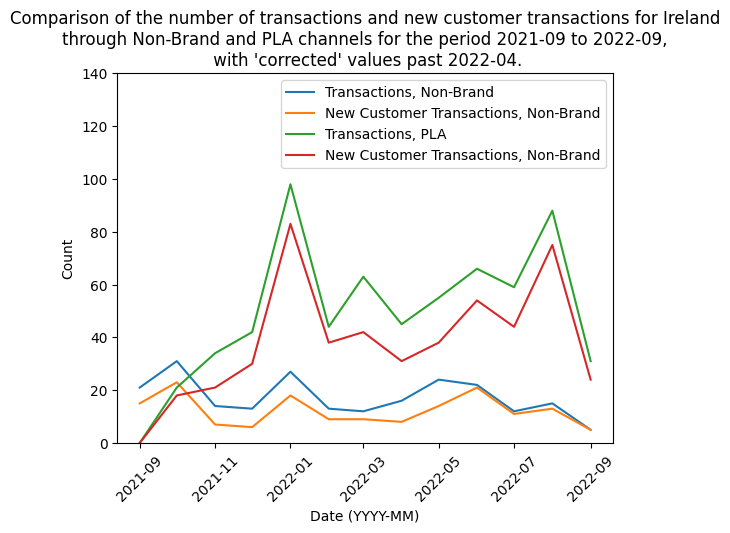

In [330]:
df = marketing_data_df[(marketing_data_df['country']=='IE')&(marketing_data_df['tpw_channels']!='Brand')&(marketing_data_df['date'] >= '2021-09-01')]

condition = (df['transactions']<=df['new_customer_transactions'])
df.loc[condition, 'new_customer_transactions'] -= df.loc[condition, 'transactions']
df.loc[~condition, 'new_customer_transactions'] = df['new_customer_transactions']

ax = sns.lineplot(x=df[df['tpw_channels']=='Non-Brand']['date'],
                  y=df[df['tpw_channels']=='Non-Brand']['transactions'],
                  label='Transactions, Non-Brand')
ax = sns.lineplot(x=df[df['tpw_channels']=='Non-Brand']['date'],
                  y=df[df['tpw_channels']=='Non-Brand']['new_customer_transactions'],
                  label='New Customer Transactions, Non-Brand')
ax = sns.lineplot(x=df[df['tpw_channels']=='PLA']['date'],
                  y=df[df['tpw_channels']=='PLA']['transactions'],
                  label='Transactions, PLA')
ax = sns.lineplot(x=df[df['tpw_channels']=='PLA']['date'],
                  y=df[df['tpw_channels']=='PLA']['new_customer_transactions'],
                  label='New Customer Transactions, Non-Brand')
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.ylim(0,140)
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Count')
plt.title(f'Comparison of the number of transactions and new customer transactions for Ireland\nthrough Non-Brand and PLA channels for the period 2021-09 to 2022-09,\n with \'corrected\' values past 2022-04.')
plt.show()

The data now makes sense, as the number of new customer transactions never exceeds the total amount of transactions and that they follow very similar patterns are increase and decline throughout the period. Therefore, I feel confident in state that this issue has been resolved, but still keeping the issue in mind.

In [337]:
condition = (marketing_data_df['transactions']<=marketing_data_df['new_customer_transactions']) #condition
marketing_data_df.loc[condition, 'new_customer_transactions'] -= marketing_data_df.loc[condition, 'transactions'] #take away values if condition is met
marketing_data_df.loc[~condition, 'new_customer_transactions'] = marketing_data_df['new_customer_transactions'] #return original values is condition is not met

We can now check our final rule for clean data (If 'impressions','clicks','transactions' = 0 $\implies$ 'revenue' = 0).

In [340]:
display(marketing_data_df[(marketing_data_df['impressions']==0)&(marketing_data_df['clicks']==0)&(marketing_data_df['transactions']==0)&(marketing_data_df['revenue']!=0)])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
228,2022-04-01,FR,Non-Brand,0,0,0,10,0,0,0.0,inf,NaN,NaN,NaN
231,2022-04-01,IT,PLA,0,0,0,9,0,0,0.0,inf,NaN,NaN,NaN
251,2022-05-01,IT,PLA,0,0,0,25,0,0,0.0,inf,NaN,NaN,NaN
256,2022-06-01,IT,PLA,0,0,0,9,0,0,0.0,inf,NaN,NaN,NaN
296,2022-08-01,IT,PLA,0,0,0,3536,0,0,0.0,inf,NaN,NaN,NaN


Here we see that there are 5 cases where revenue is generated without any transactions, impressions or clicks. Unless the data for transactions, impressions and clicks are all corrupted for this period, then we can safely say that the revenue data is incorrect for those dates and places. However, before we correct this we should view this data in context first.

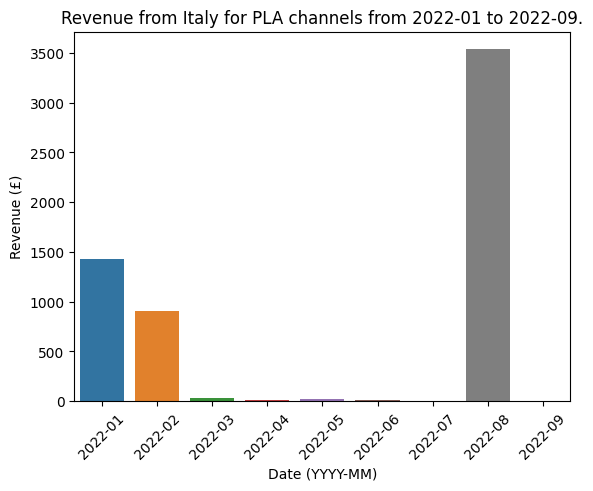

In [368]:
df = marketing_data_df[(marketing_data_df['country']=='IT')&(marketing_data_df['tpw_channels']=='PLA')&(marketing_data_df['date']>='2022-01-01')].copy()

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('M')

ax = sns.barplot(data=df,
    x='date',
    y='revenue'
)
plt.xticks(rotation=45)
plt.title('Revenue from Italy for PLA channels from 2022-01 to 2022-09.')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Revenue (£)')

plt.show()

We can clearly see that revenue was declining thoughout 2022, and that the data we are examining is indeed incorrect as as will be revalued at 0.

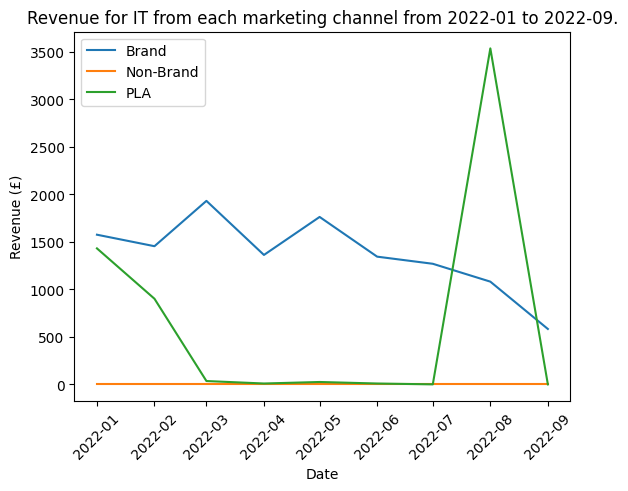

In [373]:
df = marketing_data_df[(marketing_data_df['country']=='IT')&(marketing_data_df['date']>='2022-01-01')].copy()

sns.lineplot(data = df[df['tpw_channels']=='Brand'],
             x='date',
             y='revenue',
             label='Brand')
sns.lineplot(data = df[df['tpw_channels']=='Non-Brand'],
             x='date',
             y='revenue',
             label='Non-Brand')
sns.lineplot(data = df[df['tpw_channels']=='PLA'],
             x='date',
             y='revenue',
             label='PLA')

plt.title('Revenue for IT from each marketing channel from 2022-01 to 2022-09.')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.show()

As the revenue from Brand channels was declining from 2022-05 onwards, it is hard to believe that the £3536 from revenue was generated from this. Therefore it is difficult to justify that revenue being mislabeled from Brand to PLA. Therefore, the anomalous data will be replaced with 0s. However, if this revenue turnsout to be correct, further investigation will have to be conducted.

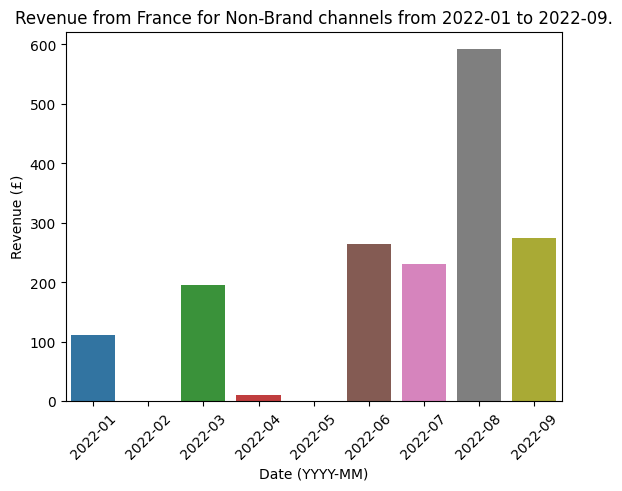

In [370]:
df = marketing_data_df[(marketing_data_df['country']=='FR')&(marketing_data_df['tpw_channels']=='Non-Brand')&(marketing_data_df['date']>='2022-01-01')].copy()

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('M')

ax = sns.barplot(data=df,
    x='date',
    y='revenue'
)
plt.xticks(rotation=45)
plt.title('Revenue from France for Non-Brand channels from 2022-01 to 2022-09.')
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Revenue (£)')

plt.show()

Furthermore, revenue for the following month of the observed month (2022-04) is also 0, meaning that the revenue that was generated was also inaccurate and will also be revalued at 0.

In [378]:
condition = (marketing_data_df['impressions']==0)&(marketing_data_df['clicks']==0)&(marketing_data_df['transactions']==0)&(marketing_data_df['revenue']!=0)
marketing_data_df.loc[condition,'revenue'] = 0

With those errors corrected, we can also check the inverse possibility ('revenue' $\neq$ 0 $\implies$ 'transactions' $\neq$ 0).

In [381]:
display(marketing_data_df[(marketing_data_df['transactions']==0)&(marketing_data_df['revenue']!=0)])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
8,2021-01-01,IT,PLA,357,193787,953,22,0,0,1622.727273,inf,0.0,0.004918,0.0
27,2021-02-01,IT,PLA,260,154207,690,23,0,0,1130.434783,inf,0.0,0.004475,0.0


Here we have found 2 records of there being revenue and no transaction. However, there is data on the impressions and clicks, suggesting that the error is with the transactions and not the revenue. However, how many transactions were there. We cannot know for certain but we can use the AOV of the other months for Italy through the PLA channels to how many to expect.

In [385]:
df = marketing_data_df[(marketing_data_df['country']=='IT')&(marketing_data_df['tpw_channels']=='PLA')&(marketing_data_df['transactions']!=0)]
display(df['revenue']/df['transactions']) #calculate AOV

112    37.375000
123    31.071429
135    30.400000
158    33.375000
165    34.058824
184    31.800000
199    31.068966
216    35.000000
dtype: float64

We see that the AOV for a transaction is roughly £30 for Italy from PLA channels. Therefore, it is safe to assume that there was at least 1 transaction that resulted in that revenue and that there was no more, if we are to try and follow the AOV.

In [388]:
condition = ((marketing_data_df['transactions']==0)&(marketing_data_df['revenue']!=0))
marketing_data_df.loc[condition,'transactions'] = 1

However, what we cannot do it determine whether that customer was a new customer or not. Thus, we shall assume that they were not new and leave that field 0.

Now that the anomalous data has been rectified as best as possible, we can re-evaluate the metrics which were influenced by them, and correct any anomalous metrics such as inf S:R ratio, arising from dividing by 0, with simply substituion.

In [403]:
marketing_data_df = generate_metrics(marketing_data_df)

marketing_data_df.loc[(marketing_data_df['spend_revenue_ratio'] == np.inf)|(marketing_data_df['spend_revenue_ratio'].isna()), 'spend_revenue_ratio'] = 0
marketing_data_df.loc[marketing_data_df['average_order_value'].isna(), 'average_order_value'] = 0
marketing_data_df.loc[(marketing_data_df['cost_per_acquisition'] == np.inf)|(marketing_data_df['cost_per_acquisition'].isna()), 'cost_per_acquisition'] = 0
marketing_data_df.loc[(marketing_data_df['click_through_rate'] == np.inf)|(marketing_data_df['click_through_rate'].isna()), 'click_through_rate'] = 0
marketing_data_df.loc[(marketing_data_df['conversion_rate'] == np.inf)|(marketing_data_df['conversion_rate'].isna()), 'conversion_rate'] = 0

In [404]:
display(marketing_data_df.head(30))

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions,spend_revenue_ratio,average_order_value,cost_per_acquisition,click_through_rate,conversion_rate
4,2021-01-01,DE,Brand,164,1335,484,1039,18,5,15.784408,57.722222,32.800000,0.362547,0.037190
13,2021-01-01,DE,Non-Brand,39,832,70,63,1,0,61.904762,63.000000,0.000000,0.084135,0.014286
9,2021-01-01,DE,PLA,589,204746,1166,0,0,0,0.000000,0.000000,0.000000,0.005695,0.000000
5,2021-01-01,FR,Brand,121,1315,538,1070,21,5,11.308411,50.952381,24.200000,0.409125,0.039033
1,2021-01-01,FR,Non-Brand,89,3384,257,116,3,1,76.724138,38.666667,89.000000,0.075946,0.011673
11,2021-01-01,FR,PLA,422,142886,567,0,0,0,0.000000,0.000000,0.000000,0.003968,0.000000
7,2021-01-01,IE,Brand,52,565,263,285,12,4,18.245614,23.750000,13.000000,0.465487,0.045627
2,2021-01-01,IE,Non-Brand,104,1698,132,62,3,2,167.741935,20.666667,52.000000,0.077739,0.022727
0,2021-01-01,IE,PLA,407,79085,350,94,4,0,432.978723,23.500000,0.000000,0.004426,0.011429
6,2021-01-01,IT,Brand,28,668,291,338,6,2,8.284024,56.333333,14.000000,0.435629,0.020619


In [1]:
monthly_dataset = marketing_data_df.groupby(['date','country'])[['date','country','spend','impressions','clicks','revenue','transactions','new_customer_transactions']].sum().reset_index()
display(monthly_dataset)

NameError: name 'marketing_data_df' is not defined

#### A:R Efficiency

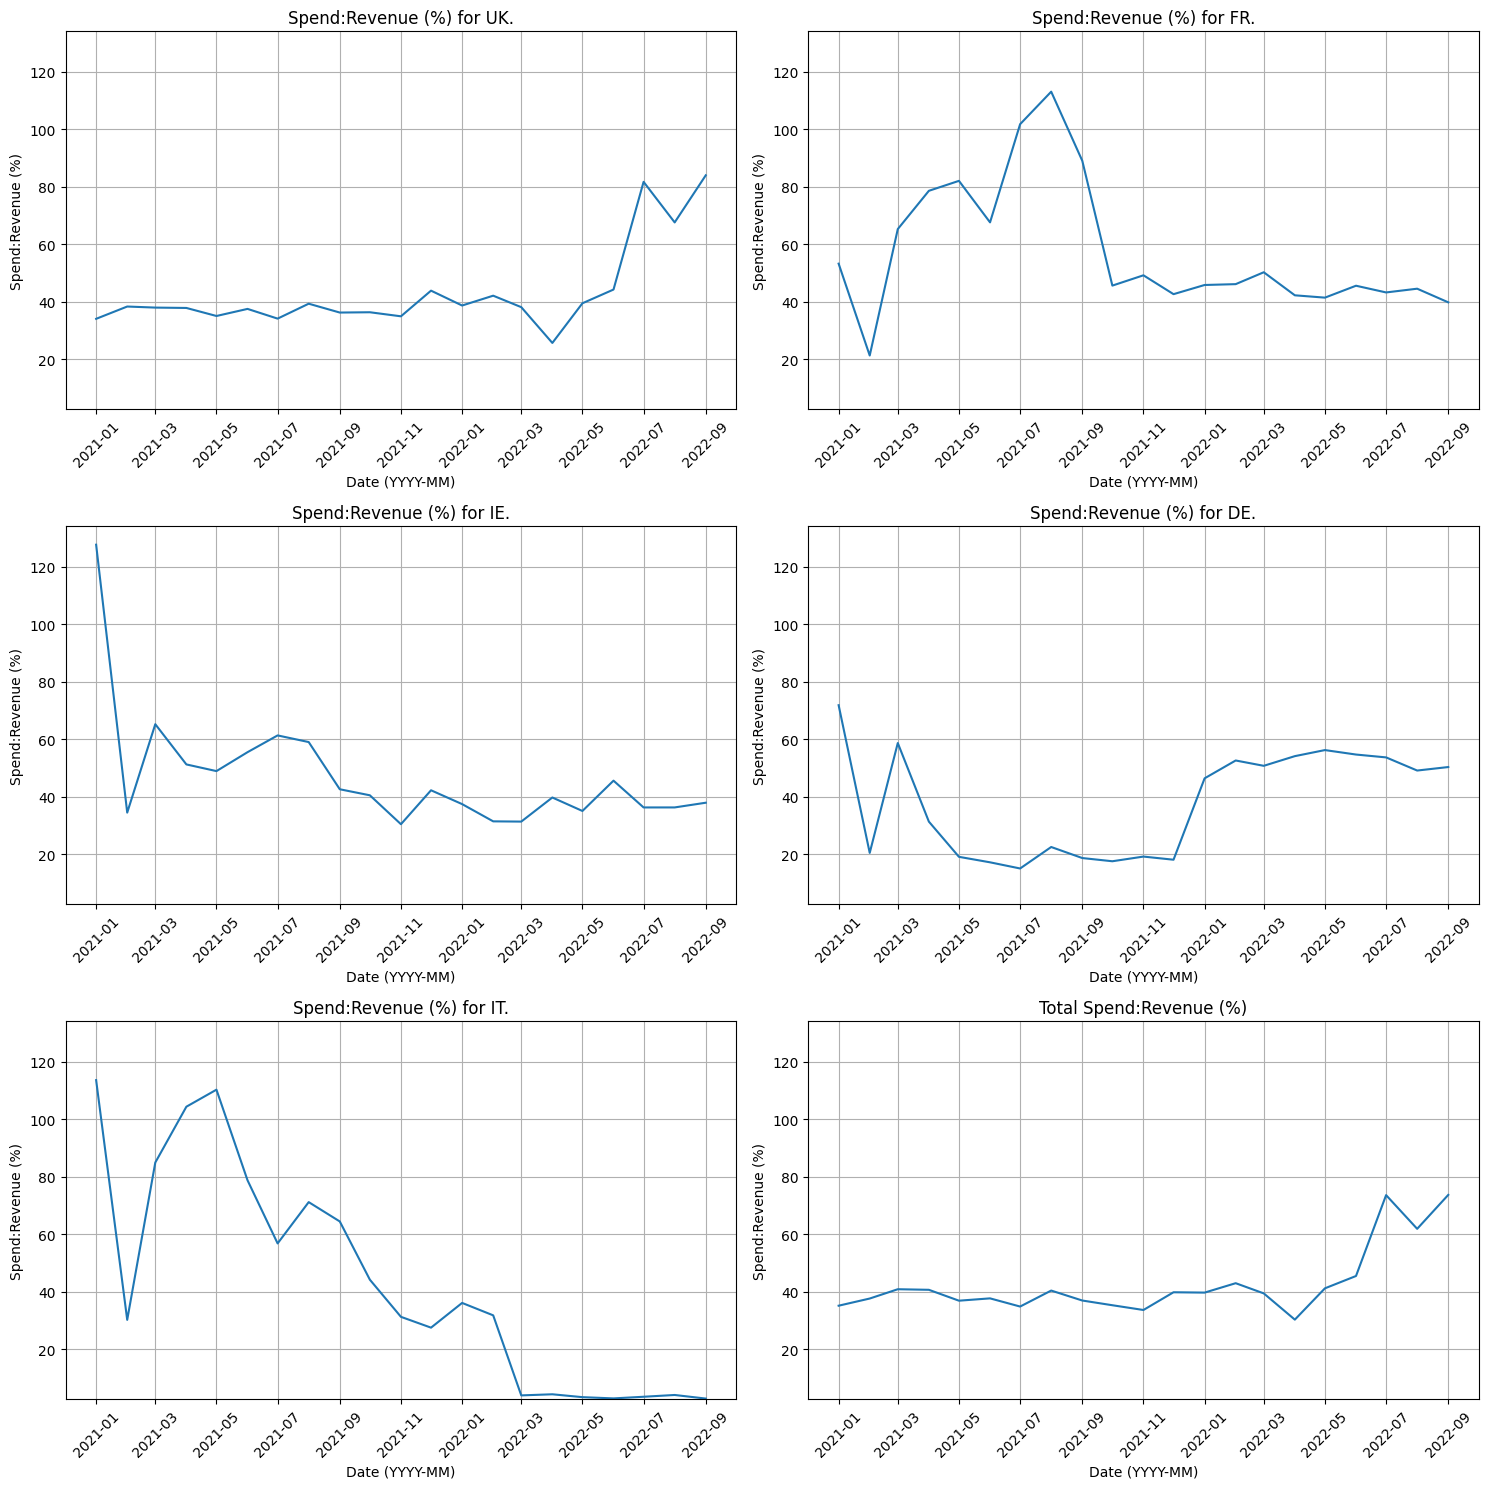

In [405]:
sr_df = marketing_data_df[['date','country','spend','revenue']].sort_values(by='date',ascending=True)
sr_df = sr_df.groupby(['date','country'])[['spend','revenue']].sum().reset_index()
sr_total_df = sr_df.groupby('date')[['spend','revenue']].sum().reset_index()

sr_df['spend_revenue_ratio'] = sr_df['spend']*100/sr_df['revenue']
sr_total_df['spend_revenue_ratio'] = sr_total_df['spend']*100/sr_total_df['revenue']

def plot_subplots(dataset,total_dataset,metric,label):
    maximum_value, minimum_value = max(max(dataset[label]),max(total_dataset[label])), min(min(dataset[label]),min(total_dataset[label]))
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))

    for axis_country in [[0,0,'UK'],[0,1,'FR'],[1,0,'IE'],[1,1,'DE'],[2,0,'IT']]:
        sns.lineplot(data=dataset[dataset['country'] == axis_country[2]],
                        x='date',
                        y=label,
                        errorbar=None,
                        ax = axes[axis_country[0],axis_country[1]])
        axes[axis_country[0],axis_country[1]].set_xticklabels(axes[axis_country[0],axis_country[1]].get_xticklabels(),rotation=45)
        axes[axis_country[0],axis_country[1]].set_title(f'{metric} for {axis_country[2]}.')
        axes[axis_country[0],axis_country[1]].set_ylabel(f'{metric}')
        axes[axis_country[0],axis_country[1]].set_xlabel('Date (YYYY-MM)')
        axes[axis_country[0],axis_country[1]].grid(True)
        axes[axis_country[0],axis_country[1]].set_ylim(0.95*minimum_value,1.05*maximum_value)

    sns.lineplot(data=total_dataset,
                        x='date',
                        y=label,
                        errorbar=None,
                        ax = axes[2,1])
    axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(),rotation=45)
    axes[2,1].set_title(f'Total {metric}')
    axes[2,1].set_ylabel(f'{metric}')
    axes[2,1].set_xlabel('Date (YYYY-MM)')
    axes[2,1].grid(True)
    axes[2,1].set_ylim(0.95*minimum_value,1.05*maximum_value)

    plt.tight_layout()
    plt.show()
    return

plot_subplots(sr_df,sr_total_df,'Spend:Revenue (%)','spend_revenue_ratio')

In [392]:
for ctry in ['UK','IE','FR','DE','IT']:
    corr = np.corrcoef(sr_df[sr_df['country'] == ctry]['spend_revenue_ratio'],sr_total_df['spend_revenue_ratio'])[0,1]
    print(f'Correlation-Coefficient between {ctry} and the total is: {round(corr,3)}.')

Correlation-Coefficient between UK and the total is: 0.992.
Correlation-Coefficient between IE and the total is: -0.235.
Correlation-Coefficient between FR and the total is: -0.269.
Correlation-Coefficient between DE and the total is: 0.353.
Correlation-Coefficient between IT and the total is: -0.44.


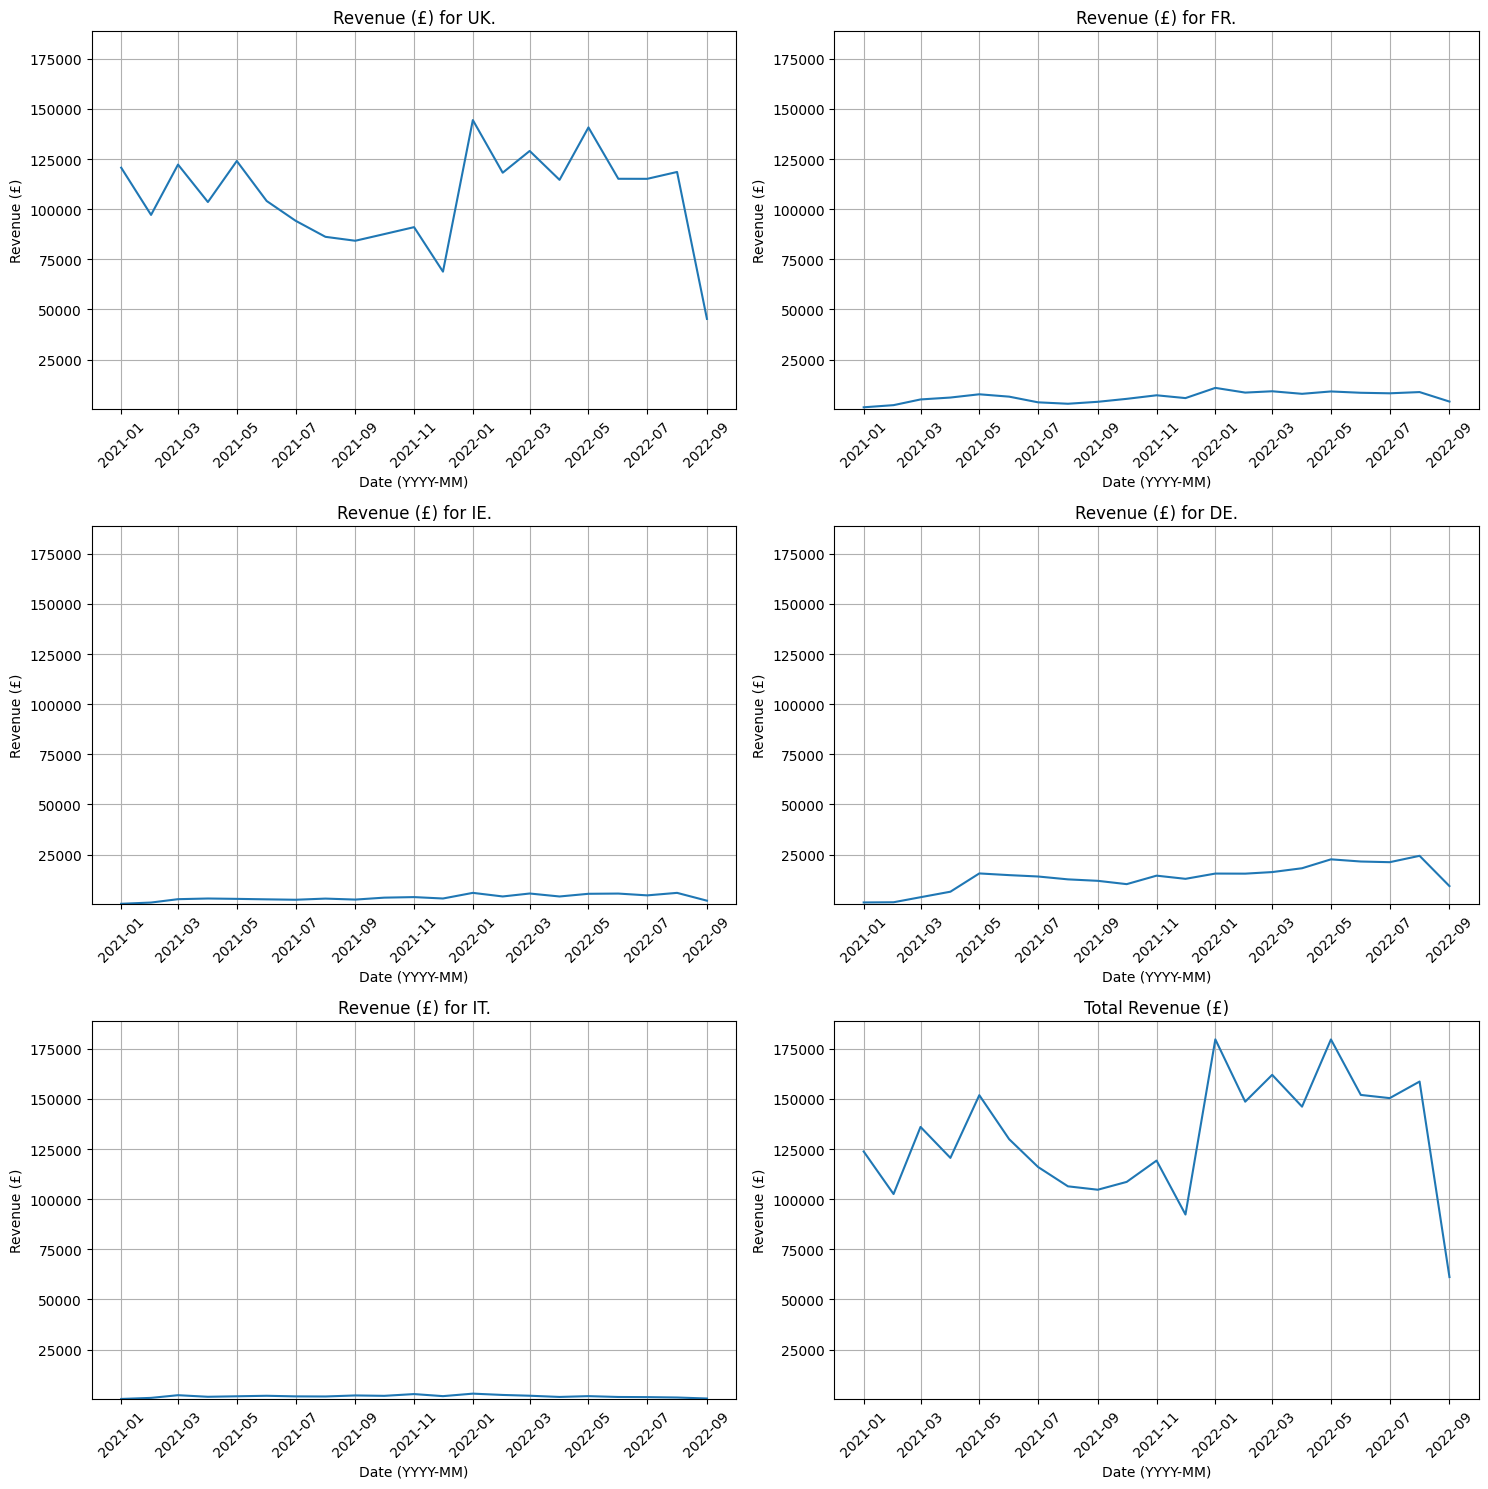

In [406]:
plot_subplots(sr_df,sr_total_df,'Revenue (£)','revenue')

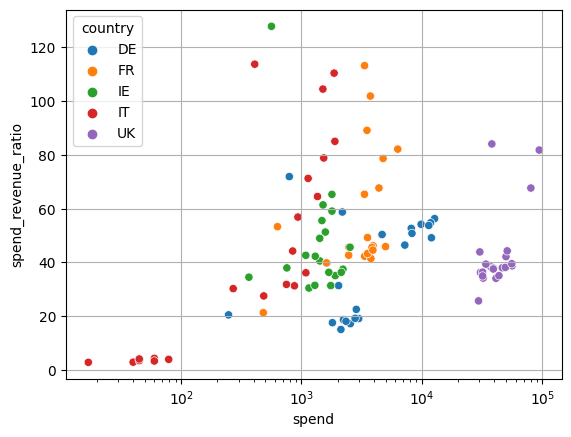

In [409]:
#fig, axes = plt.subplots(1, 2, figsize=(10, 15))

sns.scatterplot(x=sr_df['spend'],
                y=sr_df['spend_revenue_ratio'],
                hue=sr_df['country'],
                )
plt.xscale('log')
plt.grid()
plt.show()

In [410]:
for ctry in ['UK','IE','FR','DE','IT']:
    corr = np.corrcoef(sr_df[sr_df['country'] == ctry]['spend_revenue_ratio'],sr_df[sr_df['country'] == ctry]['spend'])[0,1]
    print(f'Correlation-Coefficient between {ctry}\'s S:R ratio and {ctry}\'s spend is: {round(corr,3)}.')

Correlation-Coefficient between UK's S:R ratio and UK's spend is: 0.64.
Correlation-Coefficient between IE's S:R ratio and IE's spend is: -0.272.
Correlation-Coefficient between FR's S:R ratio and FR's spend is: 0.387.
Correlation-Coefficient between DE's S:R ratio and DE's spend is: 0.589.
Correlation-Coefficient between IT's S:R ratio and IT's spend is: 0.812.


#### France Engagement

In [414]:
display(marketing_data_df[marketing_data_df['country']=='FR'][['date','click_through_rate']])

,date,click_through_rate
5,2021-01-01,0.409125
1,2021-01-01,0.075946
11,2021-01-01,0.003968
29,2021-02-01,0.405646
16,2021-02-01,0.093511
...,...,...
299,2022-08-01,0.055588
288,2022-08-01,0.004496
302,2022-09-01,1.034483
309,2022-09-01,0.048326


<Axes: xlabel='date', ylabel='click_through_rate'>

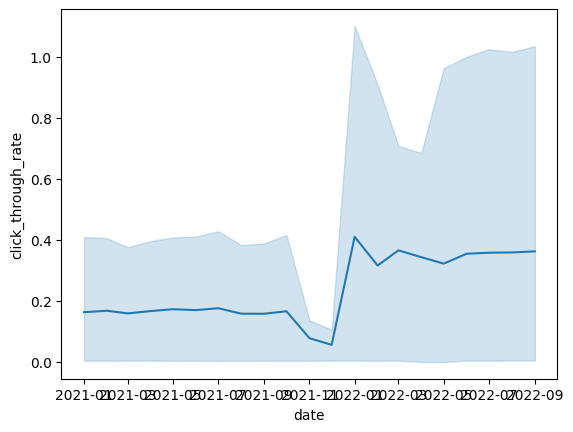

In [415]:
sns.lineplot(data=marketing_data_df[marketing_data_df['country']=='FR'][['date','click_through_rate']],
             x='date',
             y='click_through_rate'
)

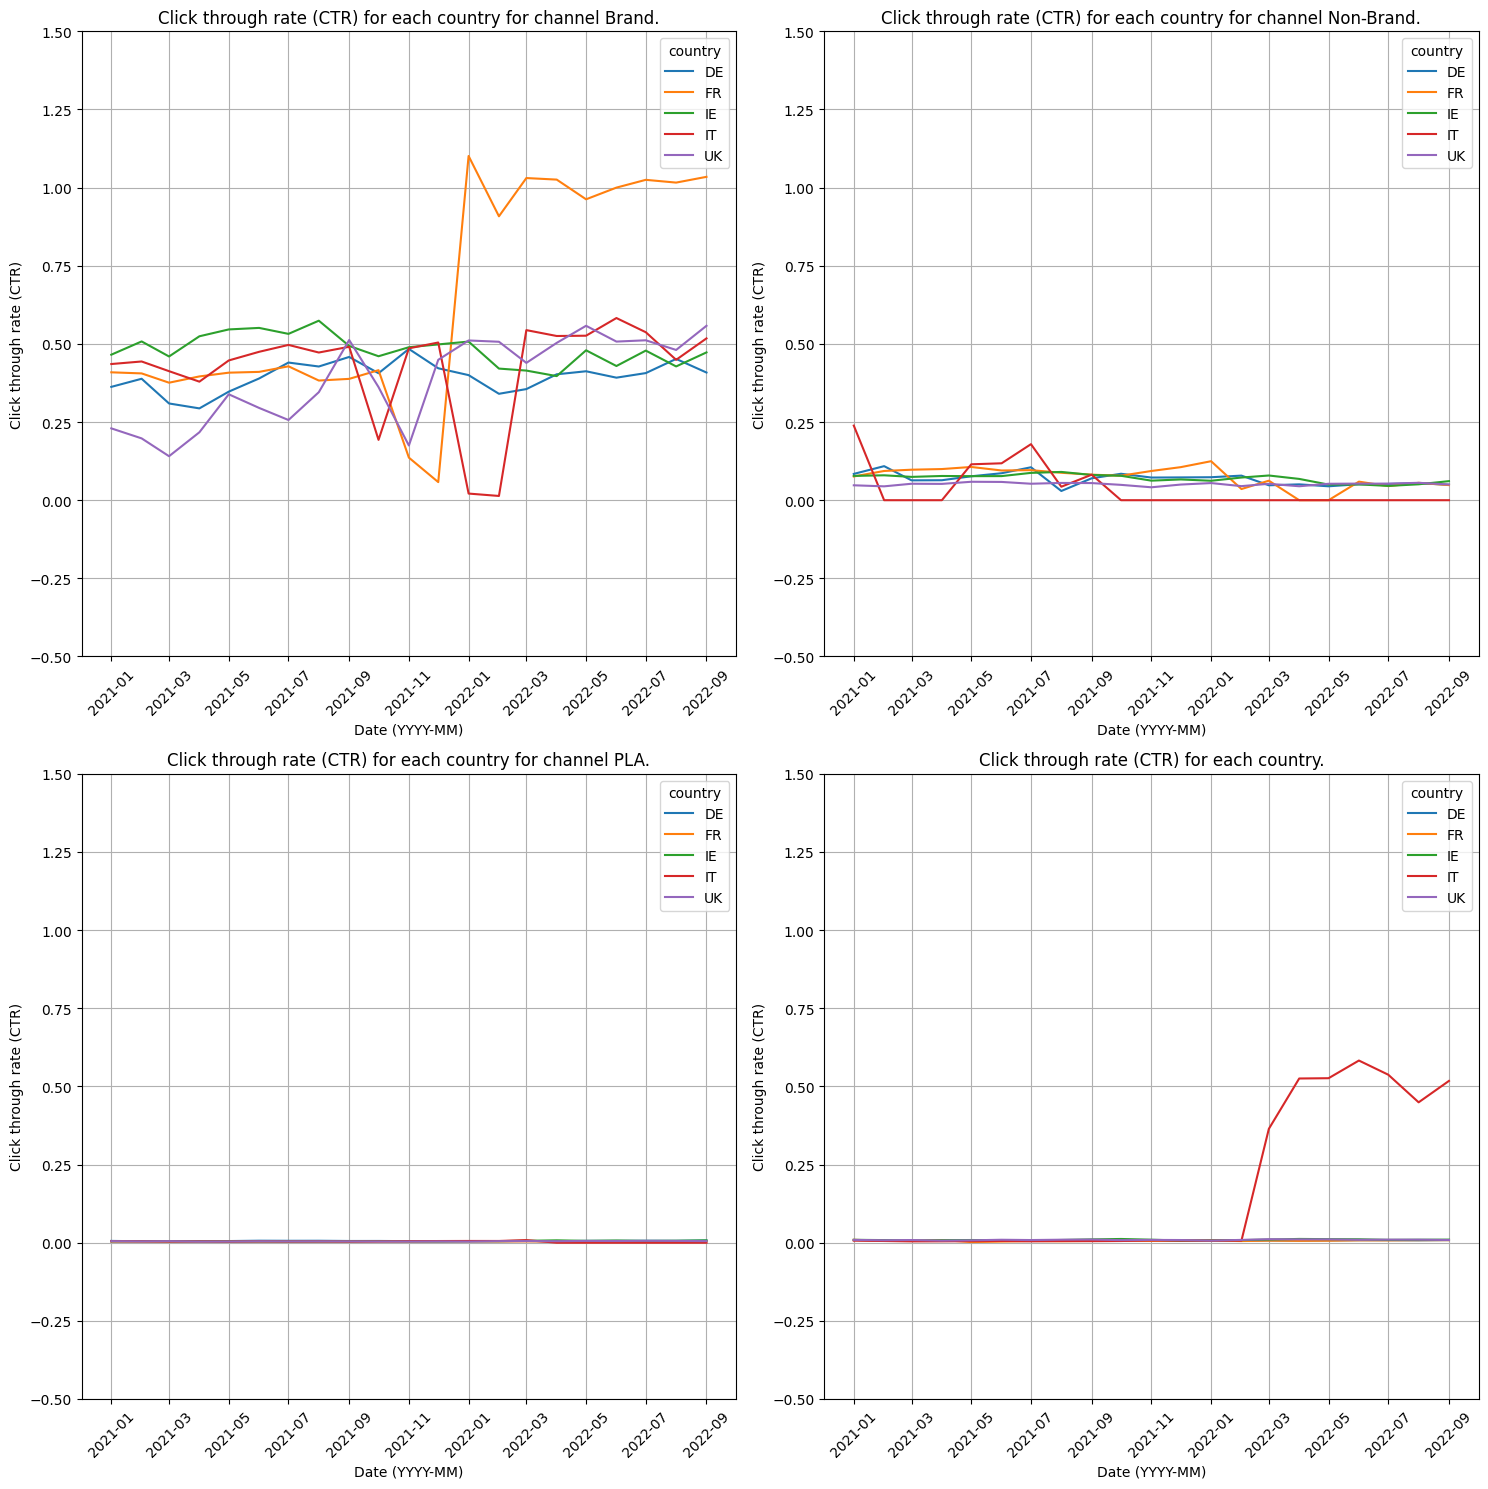

In [412]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for axe, chan in zip([axes[0,0],axes[0,1],axes[1,0]],['Brand','Non-Brand','PLA']):
    cond = marketing_data_df['tpw_channels']==chan
    sns.lineplot(x=marketing_data_df[cond]['date'],
                y=marketing_data_df[cond]['click_through_rate'],
                hue=marketing_data_df[cond]['country'],
                ci=False,
                ax=axe)
    axe.set_xticklabels(axe.get_xticklabels(),rotation=45)
    axe.set_title(f'Click through rate (CTR) for each country for channel {chan}.')
    axe.set_ylabel(f'Click through rate (CTR)')
    axe.set_xlabel('Date (YYYY-MM)')
    axe.grid(True)
    axe.set_ylim(-0.5,1.5)

    
sns.lineplot(x=all_channels_marketing_data_df['date'],
                y=all_channels_marketing_data_df['click_through_rate'],
                hue=all_channels_marketing_data_df['country'],
                ci=False,
                ax=axes[1,1])
axes[1,1].set_xticklabels(axe.get_xticklabels(),rotation=45)
axes[1,1].set_title(f'Click through rate (CTR) for each country.')
axes[1,1].set_ylabel(f'Click through rate (CTR)')
axes[1,1].set_xlabel('Date (YYYY-MM)')
axes[1,1].grid(False)
axes[1,1].set_ylim(-0.5,1.5)

plt.tight_layout()
plt.grid()
plt.show()

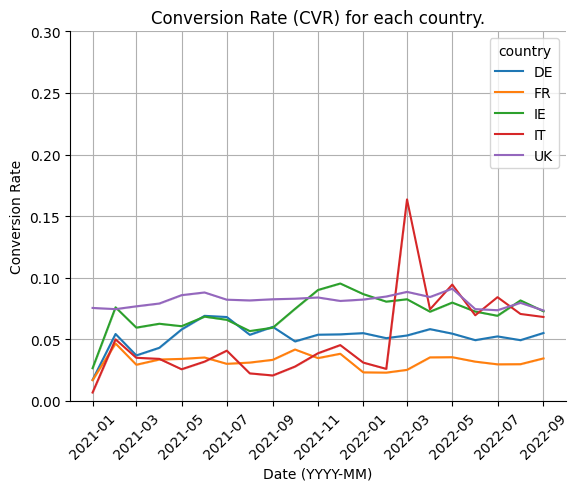

In [214]:
cond = marketing_data_df['tpw_channels']=='Brand'
ax = sns.lineplot(x=marketing_data_df[cond]['date'],
             y=marketing_data_df[cond]['conversion_rate'],
             hue=marketing_data_df[cond]['country'],
             ci=False)
ax.set_ylim(0,0.3)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title(f'Conversion Rate (CVR) for each country.')
ax.set_xlabel('Date (YYYY-MM)')
ax.set_ylabel('Conversion Rate')
ax.spines[['right', 'top']].set_visible(False)
plt.grid()
plt.show()

#### Recent Trends (3-6 months)

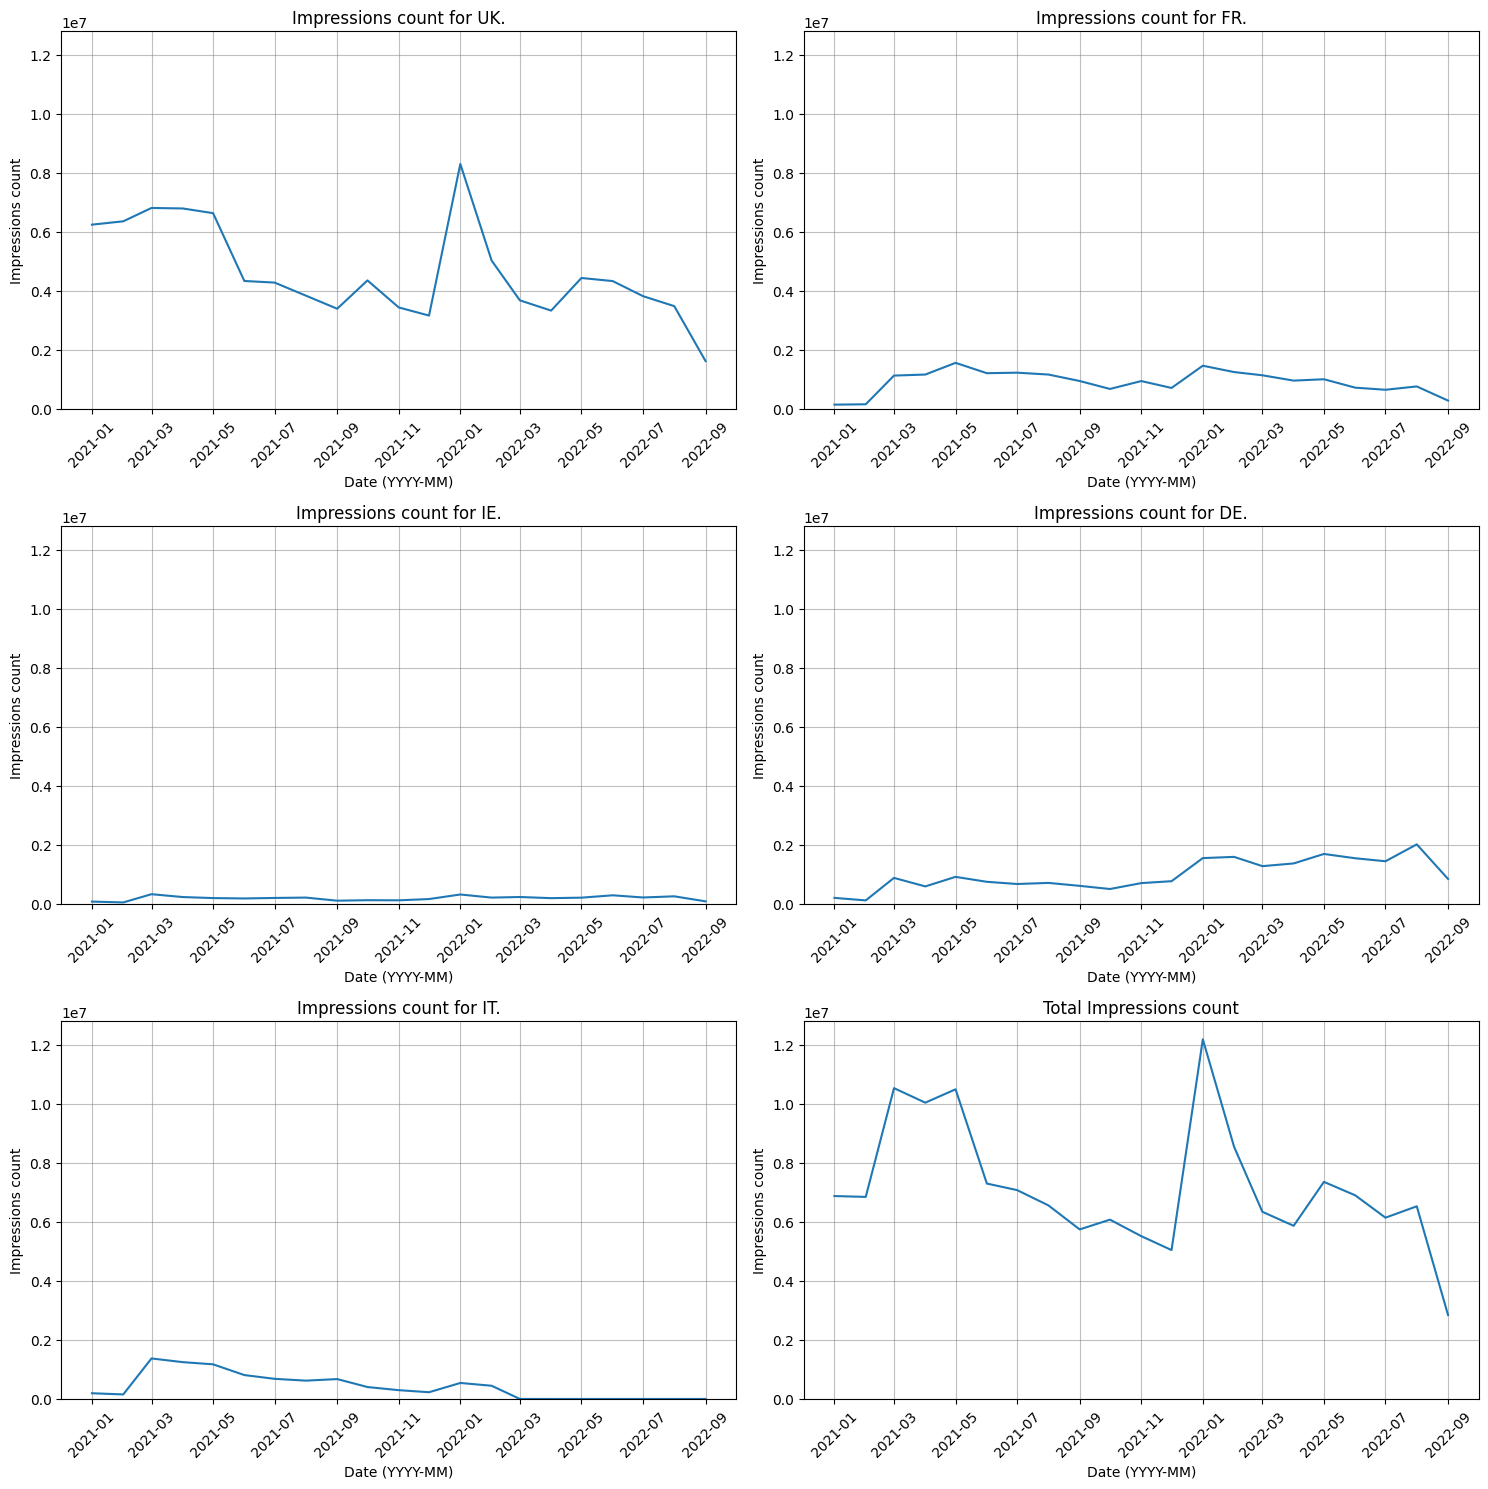

In [70]:
ad_engage_df = marketing_data_df[['date','country','impressions','clicks']].sort_values(by='date',ascending=True)
ad_engage_df = ad_engage_df.groupby(['date','country'])[['impressions','clicks']].sum().reset_index()
ad_engage_total_df = ad_engage_df.groupby('date')[['impressions','clicks']].sum().reset_index()

ad_engage_df['spend_revenue_ratio'] = ad_engage_df['spend']/sr_df['revenue']
sr_total_df['spend_revenue_ratio'] = sr_total_df['spend']*100/sr_total_df['revenue']

plot_subplots(ad_engage_df,ad_engage_total_df,'Impressions count','impressions')

#display(ad_engage_df.head(10))

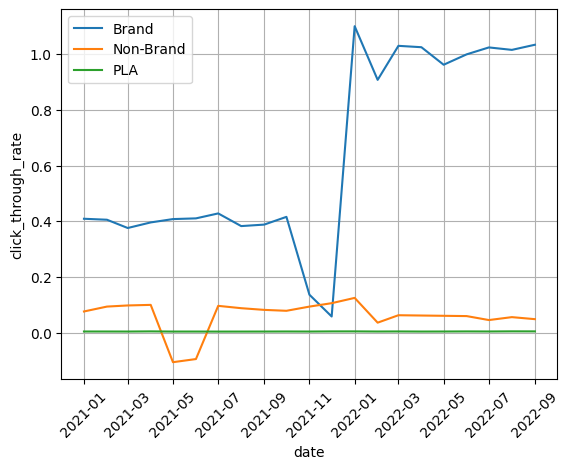

In [85]:
for channel in ['Brand','Non-Brand','PLA']:
    ax = sns.lineplot(data=monthly_dataset[(monthly_dataset['country'] == 'FR')&(monthly_dataset['tpw_channels'] == channel)],
                            x='date',
                            y='click_through_rate',
                            errorbar=None,
                            label = channel)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.grid()
plt.show()

In [97]:
df=marketing_data_df[['date','transactions']].sort_values(by='date',ascending=True)
combined_df = df.groupby('date')['transactions'].sum().reset_index()
display(combined_df)

,date,transactions
0,2021-01-01,3530
1,2021-02-01,3015
2,2021-03-01,3856
3,2021-04-01,3238
4,2021-05-01,4082
5,2021-06-01,3477
6,2021-07-01,2997
7,2021-08-01,2772
8,2021-09-01,2645
9,2021-10-01,2748


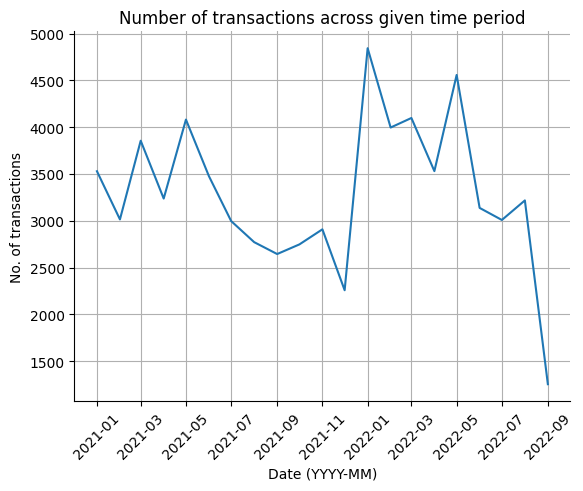

In [95]:
ax = sns.lineplot(data=combined_df,
                  x='date',
                  y='transactions',
                  errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Number of transactions across given time period')
ax.set_xlabel('Date (YYYY-MM)')
ax.set_ylabel('No. of transactions')
ax.spines[['right', 'top']].set_visible(False)
plt.grid()
plt.show()

### **Task 3** (Trading Data Visualisation)

This next task requires the analysis of the trading data and detail why the use of the arithmetic mean can be problematic. First we will view the data itself.

In [24]:
display(trading_data_df.head())

,unit_sale_price_gbp
0,11.050291
1,24.606605
2,26.305537
3,17.347053
4,27.204231


Now we will calculate the arithmetic mean of the data.

In [62]:
trading_data_mean = trading_data_df.mean().values[0]
print(f'The mean of the trading data is:\n\n£ {trading_data_mean}')

The mean of the trading data is:

£ 12.550068731936694


With a mean of roughly £12.55, we can plot the data alongside this to see how useful this statistic is at understanding the data.

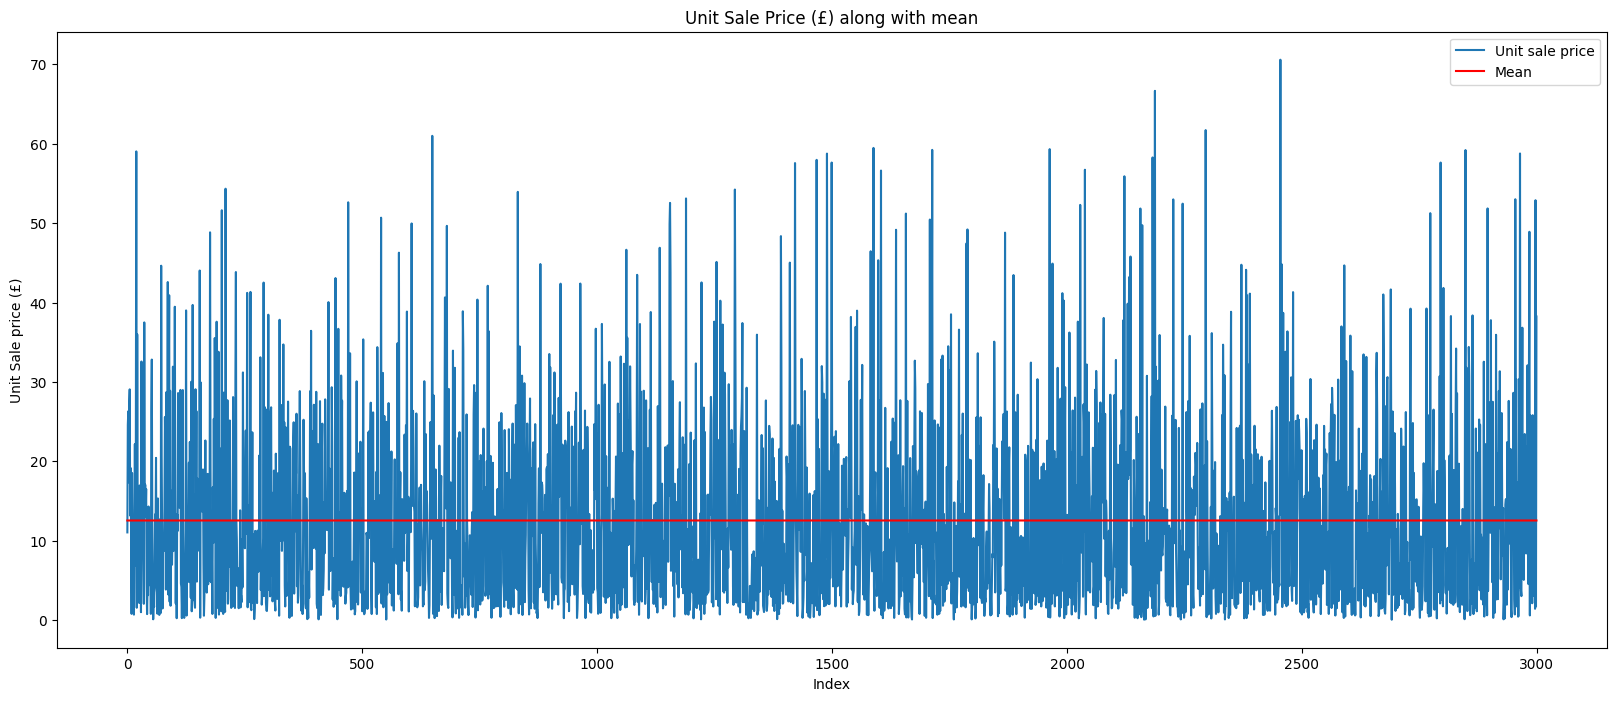

In [74]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=trading_data_df,x=trading_data_df.index,y=trading_data_df['unit_sale_price_gbp'],label='Unit sale price')
mean_plot = [trading_data_df['unit_sale_price_gbp'].mean()]*len(trading_data_df)
sns.lineplot(data=trading_data_df,x=trading_data_df.index,y=mean_plot,label='Mean',color='red')
plt.xlabel('Index')
plt.ylabel('Unit Sale price (£)') 
plt.title('Unit Sale Price (£) along with mean')
plt.legend()
plt.show()

We see that the data itself is very erratic, resembling a stochastic process with it's random nature. With this in mind, perhaps viewing the distribution of the data would yield some more insight as to the problems of using the mean.

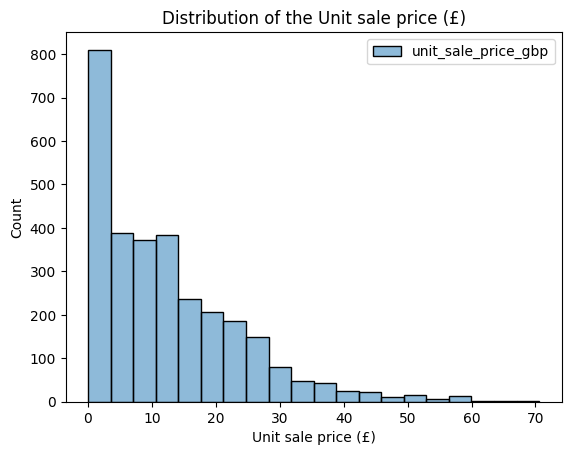

In [42]:
sns.histplot(trading_data_df, bins=20, kde=False)
plt.xlabel('Unit sale price (£)')
plt.title('Distribution of the Unit sale price (£)')
plt.show()

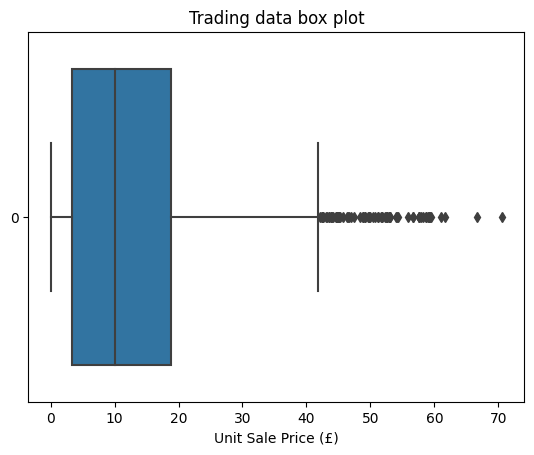

In [81]:
ax = sns.boxplot(data=trading_data_df['unit_sale_price_gbp'],orient = 'h')
plt.title('Trading data box plot')
plt.xlabel('Unit Sale Price (£)')
plt.ylabel('')
plt.show()

As we can see, the data looks to not be draw from a normal distribution. Instead, it appears to follow a log-normal or an exponential distribution, with the data heavily skewed towards 0. With this, we can now start to explain why using the average of this data would be problematic or misleading. But first, we will measure the effectiveness of the mean as a representative of the data.

In [31]:
df = abs(trading_data_df['unit_sale_price_gbp'] - trading_data_mean)
error_of_mean = sum(df)/len(df)
print(f'The average error of the arithmetic mean of the trading data is:\n\n{error_of_mean}')

The average error of the arithmetic mean of the trading data is:

8.802017354929268


We see that the average difference from the mean and the data points is around £8.80, which for a mean of £12.55, leaves a big interval for inaccuracy.

1. Due to the skewed nature of the data's distribution, the mean does not give a fair description of the centrality of the data. As the data is skewed towards smaller numbers, the mean becomes easily influenced by larger data points and thus will shift towards them and away from the majority of the data. We can see this by calculating the amount of data to the left and right of the mean. From this data we will see that the majority of the data will be located to the right of the mean. Indeed,

In [38]:
less_than_mean, greater_than_mean = len(trading_data_df[trading_data_df['unit_sale_price_gbp'] < trading_data_mean]), len(trading_data_df[trading_data_df['unit_sale_price_gbp'] > trading_data_mean])
print(f'The count of data points less than the mean: {less_than_mean}.')
print(f'The count of data points greater than the mean: {greater_than_mean}.')

The count of data points less than the mean: 1782.
The count of data points greater than the mean: 1218.


2. The mean becomes less robust when used to describe a exponential-like distribution as it is very sensitive to extreme outliers away from the rest of the data. Data points with large magnitutde heavily influence the mean and thus only a few of these values can drastically influence the integrety of the arithmetic mean.

This is why the use of other summary statistics are more useful when dealling with exponential distributions, such as the median and the IQR. These statistics are not influenced by few outliers and therefore are more robust than the mean. We will assess the usefulness of the median in our example data.

In [73]:
trading_data_median = trading_data_df.median()[0]
print(f'The median of the trading data is:\n\n£ {trading_data_median}\n')

df = abs(trading_data_df['unit_sale_price_gbp'] - trading_data_median)
error_of_mean = sum(df)/len(df)
print(f'The average error of the median of the trading data is:\n\n{error_of_mean}')

The median of the trading data is:

£ 10.002398098099004

The average error of the median of the trading data is:

8.53370319074902


The difference between the arithmetic mean and the median is a whole £2.50 decrease, as it is not being influenced by outliers with large magnitudes. We also see that the absolute error used to approximate unit sale prices also derceases as a result of this decreased value.

In [76]:
df = trading_data_df['unit_sale_price_gbp']
Q1, Q3 = df.quantile(0.25), df.quantile(0.75)

print(Q3-Q1)

15.522038229693608
